In [1]:
import csv          #create and manipulate csv files
import requests     #call from the link source
from bs4 import BeautifulSoup    #link data extraction
import json                      #json files
import pandas as pd              #statistical analysis
import re                #word cleaning
import matplotlib.pyplot as plt; plt.rcdefaults()     #graphics
import numpy as np               #mathimatical tools
import nltk                     #natural language processing
import pprint                   #data presentation
from textblob import TextBlob   #tokenization

In [2]:
link1 = 'https://www.insomnia.gr/forums/topic/697881-amd-radeon-vii/'
link2 = 'https://www.insomnia.gr/forums/topic/706516-%CE%BA%CE%AC%CF%81%CF%84%CE%B5%CF%82-%CE%B3%CF%81%CE%B1%CF%86%CE%B9%CE%BA%CF%8E%CE%BD-amd-navi/'

# Part I

* Data
* Web Scraper
* Data Collection
* Data processing/saving in proper format

## Collection & Pagination

* Page number:**<input class = "ipsField_fullWidth"** taking **.tag** [min,max]
* Data for study:
  **< script type = "application/ld + json">**   
* data list **json** 

## Manipulation & Createfile

* Data Classification of sort of **jason data** in 3 classes **author**|**date_time**|**comments**
* Save as **.csv** format

In [5]:
# data extraction class
# saving the data in proper format

class extraction:
    #class parameters
    #private variables 
    def __init__(self, link):
        self.listd = []
        self.author = []
        self.hmera_wra = []
        self.comments = []
        self.data = pd.DataFrame()
        page = requests.get(link)
        soup = BeautifulSoup(page.text,'html.parser') #html reading
        pagination = soup.find("input",{"class":"ipsField_fullWidth"}) #page inspector 
        self.maxim = int(pagination['max']) #max page
        self.minim = int(pagination['min']) #mini page
        self.link = link
        
    def collection(self):
        listd = []
        for k in range (self.minim,self.maxim+1):
            url = self.link+'/page/'+str(k)+'/'
            page = requests.get(url)
            soup = BeautifulSoup(page.text,'html.parser')
            data = soup.findAll("script",type="application/ld+json")#data inspector
            js = json.loads(data[0].text) #data[0] json files
            self.listd.append(js) #list
            
    def manipulation (self):
        for i in self.listd:
            for j in i['comment']: #json file properties
                auth = j['author']['name']
                time = j['dateCreated']
                com = j['text'].replace('\n','').replace('\t','') #clean text
                self.author.append(auth) # collecting author DATA
                self.hmera_wra.append(time) # collecting time DATA
                self.comments.append(com) #collecting comments DATA
                
    def createfile (self):
        self.data = pd.DataFrame({'author':self.author,
                 'hmera_wra':self.hmera_wra,'comments':self.comments}) #pd.DataFrame for PartII 
        if self.link == link1:
            self.data.to_csv(r'/home/tasos/Desktop/link1.csv') #saved file
        else:
            self.data.to_csv(r'/home/tasos/Desktop/link2.csv') #saved file
        return self.data

In [6]:
# pie charts function

def piechart(DATA):
    
    WRES = pd.to_datetime(DATA.hmera_wra).dt.hour
    
    #sorting / 5 hours
    prwto = list(WRES.between(0,4))
    deutero = list(WRES.between(5,9))
    trito = list(WRES.between(10,14))
    tetarto = list(WRES.between(15,19))
    pempto = list(WRES.between(20,23))

    #number of commetns / category
    prwto_pentawro = prwto.count(True)
    deutero_pentawro = deutero.count(True)
    trito_pentawro = trito.count(True)
    tetarto_pentawro = tetarto.count(True)
    pempto_pentawro = pempto.count(True)

    #total number of comments
    total = prwto_pentawro + deutero_pentawro + trito_pentawro + tetarto_pentawro + pempto_pentawro

    #percentage %
    pos1 = float(prwto_pentawro/total)
    pos2 = float(deutero_pentawro/total)
    pos3 = float(trito_pentawro/total)
    pos4 = float(tetarto_pentawro/total)
    pos5 = float(pempto_pentawro/total)
    
    return pos1,pos2,pos3,pos4,pos5

# Part 2

## Radeon - VII

In [8]:
#data to link1 RADEON-VII

extra1 = extraction(link1)
extra1.collection()
extra1.manipulation()
DATA1 = extra1.createfile()

## Number of Comments/Author

In [9]:
author_counter = DATA1.groupby(['author']).size().reset_index(name='count')
author_counter;
author_counter.loc[author_counter['count'].idxmax()] #author most comments 

author    Psycho_Warhead
count                260
Name: 39, dtype: object

## Rate of comments / Time

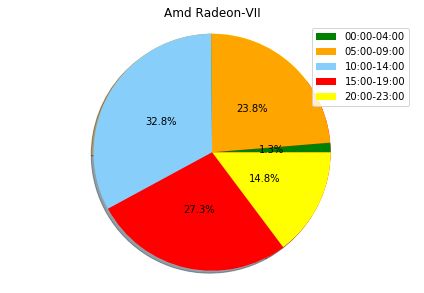

In [10]:
#pie chart

piechart(DATA1)

labels = ['00:00-04:00', '05:00-09:00', '10:00-14:00' , '15:00-19:00' , '20:00-23:00']
sizes = [piechart(DATA1)[0], piechart(DATA1)[1], piechart(DATA1)[2], piechart(DATA1)[3], piechart(DATA1)[4]]
colors = ['green', 'orange', 'lightskyblue','red','yellow']
patches, texts = plt.pie(sizes, colors=colors ,shadow=True, startangle=90)

plt.pie(sizes, colors=colors ,autopct='%0.1f%%', pctdistance=0.5, labeldistance=1.2)
plt.legend(patches ,labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Amd Radeon-VII')
plt.show()

## Number of commetns  / mounth

ValueError: shape mismatch: objects cannot be broadcast to a single shape

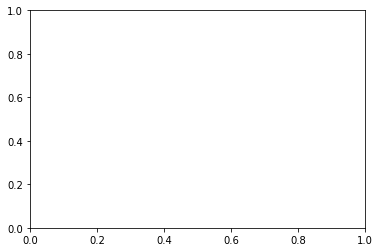

In [12]:
#sting data -> data date&time

DATA1['hmera_wra'] = pd.to_datetime(DATA1.hmera_wra)
MONTHS = DATA1['hmera_wra'].dt.month
COUNTER = MONTHS.value_counts(sort=False)# #commetns/mounth
months_axis = list(COUNTER.index)
counts_axis = list(COUNTER)

#chart
#objects = ('January', 'Febrouary', 'Mars', 'April',
#           'May', 'June','July','August','September','October','November','December')
y_pos = np.arange(len(objects))

plt.bar(y_pos, counts_axis, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Amd Radeon-VII')
plt.rcParams["figure.figsize"] = (22,15)
plt.show()

# Radeon Navi

In [13]:
#Dedomena apo to link2 RADEON Navi

extra2 = extraction(link2)
extra2.collection()
extra2.manipulation()
DATA2 = extra2.createfile()

## Number of Commetns/Author

In [14]:
author_counter = DATA2.groupby(['author']).size().reset_index(name='count')
author_counter;
author_counter.loc[author_counter['count'].idxmax()]#author with most comments

author    Arkin
count       663
Name: 9, dtype: object

## Rate of comments / Time

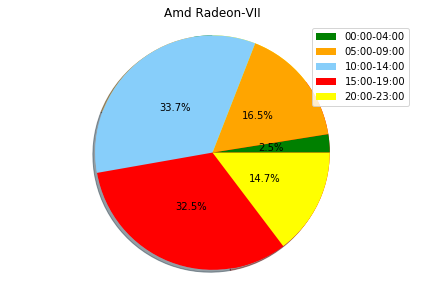

In [15]:
piechart(DATA2)

labels = ['00:00-04:00', '05:00-09:00', '10:00-14:00' , '15:00-19:00' , '20:00-23:00']
sizes = [piechart(DATA2)[0], piechart(DATA2)[1], piechart(DATA2)[2], piechart(DATA2)[3], piechart(DATA2)[4]]
colors = ['green', 'orange', 'lightskyblue','red','yellow']
patches, texts = plt.pie(sizes, colors=colors ,shadow=True, startangle=90)

plt.pie(sizes, colors=colors ,autopct='%0.1f%%', pctdistance=0.5, labeldistance=1.2)
plt.legend(patches ,labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Amd Radeon-VII')
plt.show()

## Number of Comments/Mounth

ValueError: shape mismatch: objects cannot be broadcast to a single shape

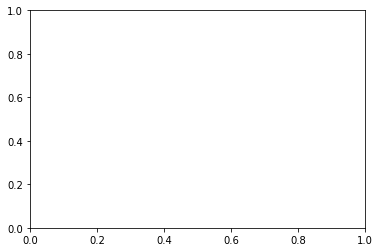

In [16]:
#sorting data -> data date&time
DATA2['hmera_wra'] = pd.to_datetime(DATA2.hmera_wra)
MONTHS = DATA2['hmera_wra'].dt.month


COUNTER = MONTHS.value_counts(sort=False)
months_axis = list(COUNTER.index)
counts_axis = list(COUNTER)

objects=('January', 'Febrouary', 'Mars', 'April', 'May', 'June','July','August','September')
y_pos = np.arange(len(objects))

#pie chart
plt.bar(y_pos, counts_axis, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Amd Navi')
plt.rcParams["figure.figsize"] = (22,15)
plt.show()

# Part 3

# NLP

## keywords

* Import specific libraries
* Transform string form -> text form
* Words Collection
* Cleaning (stopwords)
* Results

## AMD RADEON-VII

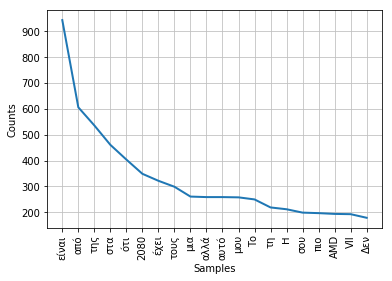

In [17]:
from textblob import TextBlob #eisagwgh katallhlhs klasshs 
from nltk.corpus import stopwords #eisagwgh katallhlhs listas apo stopwords
sr= stopwords.words('greek') #lista stopword prosarmosmenh sta ellhnika
features1 = DATA1['comments'][0:].values #times poy phrame apo to DataFrame 

#syllogh twn protasewn/comments se mia lista
# gia thn epexergasia twn sxoliwn sunolika
lista1 = [] 
for i in features1:
    lista1.append(i)
z1=''.join(lista1)
wiki1 = TextBlob(z1)
tokens1 = wiki1.words # oi lexeis pou periexontai stin lista

#diadikasia evresis keywords
clean_tokens1 = [token for token in tokens1 if token not in sr] #katharismos twn lexewn apo stopwords
freq1 = nltk.FreqDist(clean_tokens1) #ejagwgh apotelesmatwn
#for key1,val1 in freq1.items():
#    print(str(key1) + ':' + str(val1))
freq1.plot(20, cumulative=False)

## AMD Navi

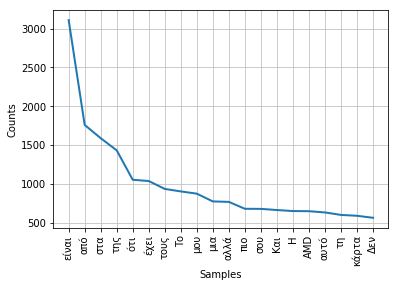

In [18]:
from textblob import TextBlob
from nltk.corpus import stopwords
sr= stopwords.words('greek')
features2 = DATA2['comments'][0:].values

lista2 = []
for i in features2:
    lista2.append(i)
z2=''.join(lista2)
wiki2 = TextBlob(z2)
tokens2 = wiki2.words

clean_tokens2 = [token for token in tokens2 if token not in sr]
freq2 = nltk.FreqDist(clean_tokens2)
#for key2,val2 in freq2.items():
#    print(str(key2) + ':' + str(val2))
freq2.plot(20, cumulative=False)